In [1]:
from brian2 import *

In [2]:
# Parameters
C = 281 * pF
gL = 30 * nS
taum = C / gL
EL = -70.6 * mV
VT = -50.4 * mV
DeltaT = 2 * mV
Vcut = VT + 5 * DeltaT

# Pick an electrophysiological behaviour
tauw, a, b, Vr = 144*ms, 4*nS, 0.0805*nA, -70.6*mV # Regular spiking (as in the paper)
#tauw,a,b,Vr=20*ms,4*nS,0.5*nA,VT+5*mV # Bursting
#tauw,a,b,Vr=144*ms,2*C/(144*ms),0*nA,-70.6*mV # Fast spiking

tau = 5*ms
sigma = 5*mV
N = 200

eqs = """
dvm/dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I - w)/C + sigma*sqrt(2/tau)*xi : volt
dw/dt = (a*(vm - EL) - w)/tauw : amp
I : amp
"""

neuron = NeuronGroup(N, model=eqs, threshold='vm>Vcut',
                     reset="vm=Vr; w+=b", method='euler')
neuron.vm = EL
traces = np.linspace(0,N-1,10,dtype=int)
trace = StateMonitor(neuron, 'vm', record=traces)
spikes = SpikeMonitor(neuron)

In [3]:
neuron.I = np.linspace(0,1,N) * nA
run(10*second)

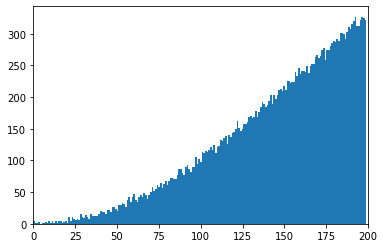

In [4]:
plt.hist(spikes.i,N)
plt.xlim(0,N);

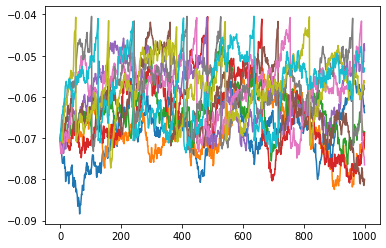

In [5]:
for i in range(len(traces)):
    plt.plot(trace.vm[i,:1000])